In [2]:
import dataset
import numpy as np
import matplotlib.pyplot as plt

db = dataset.connect('sqlite:///../../data/barsave.db')

estimators = {}

for row in db.query('select name, score from estimators'):
    key = row.get('name')
    val = row.get('score')
    key_arr = key.split('_')
    ins = key_arr[0] + '_' + key_arr[1]
    typ = key_arr[2]
    if ins in estimators.keys():
        estimators[ins][typ] = val
    else:
        estimators[ins] = { typ: val }
    
estimators

{'AU200_AUD': {'close': -0.08582016348502497,
  'high': -0.23527488533975416,
  'low': -0.1233441903630584,
  'open': 0.30898296350505866,
  'vol': -2.1762441785935747},
 'AUD_CAD': {'close': -0.13022407192084892,
  'high': -0.15676443894464445,
  'low': -0.37728399301265075,
  'open': 0.8052869991878301,
  'vol': -0.059434765538234124},
 'AUD_CHF': {'close': -0.06345742521723456,
  'high': -0.17185542348673466,
  'low': -0.17987578763625453,
  'open': 0.5478536104732551,
  'vol': -0.1524522098717723},
 'AUD_HKD': {'close': -0.2747239947455049,
  'high': -0.2976074393296657,
  'low': -0.32105300322168223,
  'open': 0.7117080729899339,
  'vol': 0.015282185954809383},
 'AUD_JPY': {'close': -0.1631230921206012,
  'high': -0.13624415322445196,
  'low': -0.28270090596450276,
  'open': -0.4867022887387716,
  'vol': -0.18969850414735426},
 'AUD_NZD': {'close': -0.12231920043029088,
  'high': -0.26687592296812745,
  'low': -0.47989963684343445,
  'open': 0.8270231770569213,
  'vol': -0.1221306

In [3]:
ope = []
clo = []
hig = []
low = []
#vol = []
for key in estimators.keys():
    ope.append(estimators[key].get('open'))
    hig.append(estimators[key].get('high'))
    low.append(estimators[key].get('low'))
    clo.append(estimators[key].get('close'))
    #vol.append(estimators[key].get('vol'))
len(ope)

124

Current size: [6.0, 4.0]


{'whiskers': [<matplotlib.lines.Line2D at 0xcf4bf70>,
 'caps': [<matplotlib.lines.Line2D at 0xcf5e3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xcf4bd50>,
 'medians': [<matplotlib.lines.Line2D at 0xcf5e8f0>,
 'fliers': [<matplotlib.lines.Line2D at 0xcf5eaf0>,
 'means': []}

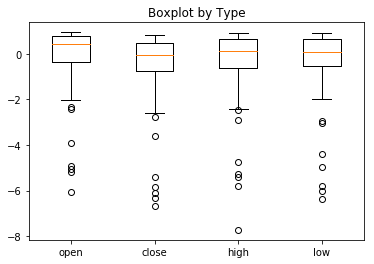

In [4]:
fig1, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
print("Current size: " + str(fig_size))
fig_size[0] = 18
fig_size[1] = 12
ax1.set_title('Boxplot by Type')
ax1.boxplot([ope, clo, hig, low], labels = ['open', 'close', 'high', 'low'])
# Get current size
#plt.rcParams["figure.figsize"] = fig_size

In [16]:
vlist = []
for key in estimators.keys():
    r2 = estimators[key].get('open')
    r2 += estimators[key].get('close')
    r2 += estimators[key].get('high')
    r2 += estimators[key].get('low')
    r2 += estimators[key].get('vol')
    vlist.append({'ins': key, 'r2': r2})
    
vlist = sorted(vlist, key = lambda x: x.get('r2'), reverse = True)

for line in vlist:
    print(line.get('ins') + ' -- ' + str(line.get('r2')))

NZD_HKD -- 3.4256099532377435
CAD_SGD -- 3.421949556452395
XAU_CAD -- 3.3969803374569465
CAD_CHF -- 3.2411544898705897
GBP_CHF -- 3.2045089534278346
NZD_USD -- 3.1941106354020716
XAU_SGD -- 3.0913289582190235
GBP_CAD -- 3.078418746142668
AUD_NZD -- 3.051746750530844
USD_ZAR -- 3.050856513731541
AUD_CAD -- 2.9937162104614297
GBP_ZAR -- 2.957314652248027
SGD_CHF -- 2.902514289961596
USD_NOK -- 2.875287962586367
CHF_ZAR -- 2.8704476392887965
AUD_HKD -- 2.8534289765748304
GBP_SGD -- 2.8472332799314
NATGAS_USD -- 2.84272333241371
XAU_GBP -- 2.823913829986342
EUR_ZAR -- 2.814823211127575
AUD_USD -- 2.8012262566287056
CAD_JPY -- 2.7379827680236066
XAU_CHF -- 2.730918500099862
USD_JPY -- 2.7101945247240398
NZD_SGD -- 2.7042628664419994
XAU_AUD -- 2.5292255617936106
XAU_USD -- 2.4918758704762727
HKD_JPY -- 2.4334643735615504
NZD_CHF -- 2.426348791965211
ZAR_JPY -- 2.426179325521887
CHF_JPY -- 2.4137205106441915
XPT_USD -- 2.4078571879488395
USD_CHF -- 2.392522693034508
XAU_HKD -- 2.357864511873